# Thinkful Final Capstone 

A supervised Learning Model to classify a Small Business Administration 7(a) loan application
to determine the number of jobs the loan would support. 

Small Business Administration bills itself as: 

* Created in 1953. 
* Helps small business owners and entrepreneurs pursue the American dream. 
* SBA is the only cabinet-level federal agency fully dedicated to small business and provides counseling, capital, and contracting expertise as the nation’s only go-to resource and voice for small businesses.

The SBA 7(a) loan program is the agency's most common loan program for small businesses. The loan includes financial aid for businesses - with conditions. 

This type of loan can be used for but not limited to:

* Real estate as part of a business purchase
* Short and long term working capital 
* Refinancing current business debt
* Purchasing and installation of machinery and equipment
* Purchasing furniture, fixtures, and supplies

The maximum loan amount is for $5 million.

Learn more about SBA 7(a) loans here: 

https://www.sba.gov/funding-programs/loans/7a-loans

Purpose: The goal of this project is to create a deployable machine learning classification model using SBA 7(a) loan data. The aim is to predict the number of jobs supported using the most relevant features. 

Dataset Features: 
    
Variables: 
    Maybe use Project State as the basis for the rich state and poor state variables.
Rich state: Binary variable top 10 rich states (rich state yes or no, use In Excel use IF statement, with OR for each state
Poor state: Binary variable top 10 poor state (same as above except for poor states)
- Use state median income frome here: https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_income
- States and territories ranked by median household income

SBA Guaranteed Approval

Gross Approval

Initial Interest Rate

Term in Months

Business Type --> split into 0 and 1 binary variables

Business Age --> split into 0 and 1 binary variables

Paid in Full: make binary, yes or no

Revolver Status --> already 0 and 1 binary variable 

Loan Status --> filter out cancelled loans and split into 0 and 1 binary variables

Approval Fiscal Year --> 2020 or not / or filter out for one particular fiscal year

Outcome Variable --> Jobs Supported (self-reported) - Median = 5, Mean = 11; mode = 2
- Low: <= 5, Medium: 5 - 11 (Mean to Median); High: 12 or more 
- 

WSJ: 10 or less JobsSupported (1) ; > 10 = 0 
"""

In [1]:
# Import packages 

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 


In [2]:
# Filtered the rows to include only jobs supported 1 and 20 jobs supported. Original work model performance was 70% for XGBoost which was the best. Otherwise 50s and 60s for accuracy. 

data = "C:/Portfolio/Data Engineer Track/Thinkful/Final Capstone/sba_7a_loan.csv"

df = pd.read_csv(data)




In [ ]:
# Summary statistics for dataframe features

df.describe()

In [ ]:
# This is a series of plots for the numeric features. 

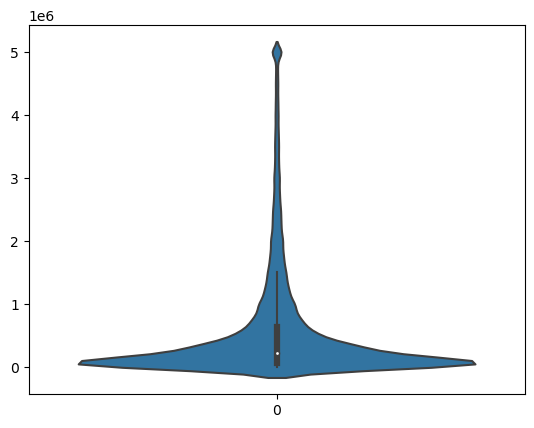

In [3]:
# Gross approval for violin plot 

import seaborn 

sns.violinplot(data = df["GrossApproval"])

plt.show()

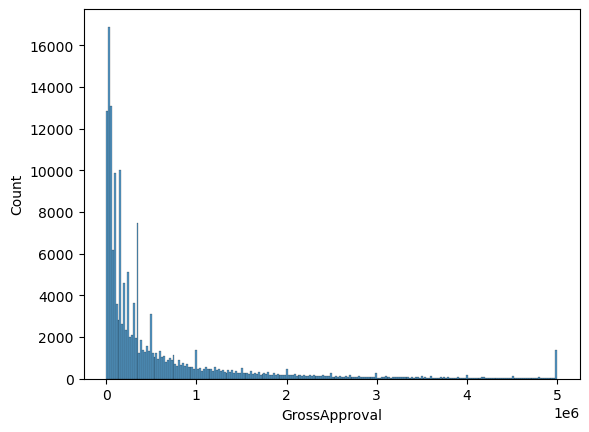

In [4]:
# Gross approval histogram 

sns.histplot(data = df["GrossApproval"])

plt.show()

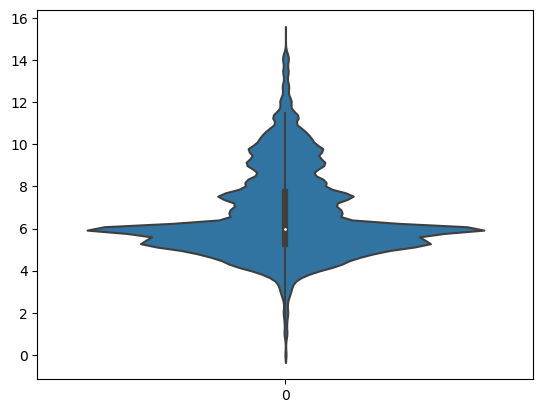

In [5]:
# Initial Interest Rate violin plot

sns.violinplot(data = df["InitialInterestRate"])
plt.show()

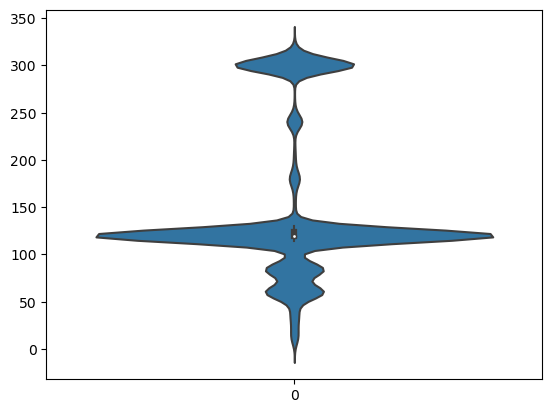

In [6]:
# Terms in months violin plot 

sns.violinplot(data = df["TermInMonths"])

plt.show()

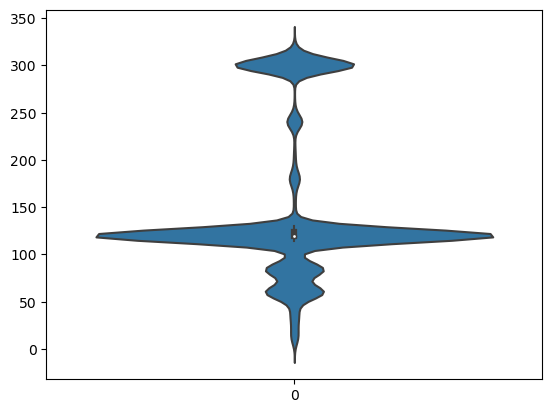

In [7]:
# Terms in Months violin plot

sns.violinplot(data = df["TermInMonths"])
plt.show()

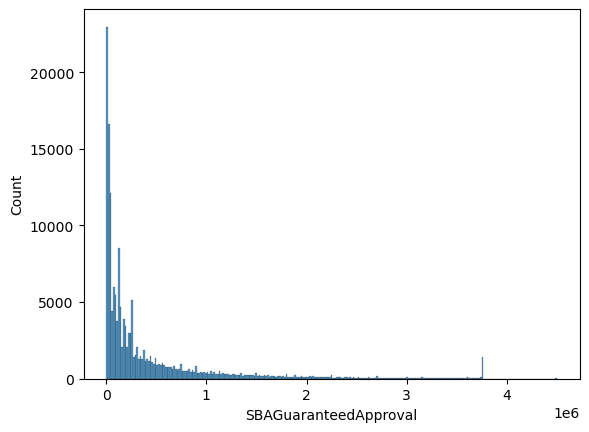

In [8]:
# SBA Guaranteed Approval histogram 

sns.histplot(data = df["SBAGuaranteedApproval"])

plt.show()

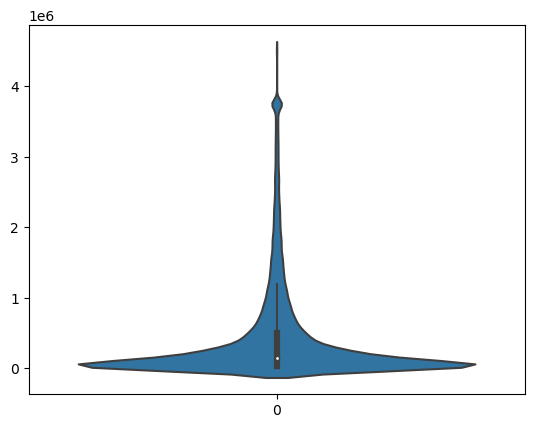

In [9]:
# SBA Guaranteed Approval violin plot 

sns.violinplot(data = df["SBAGuaranteedApproval"])
plt.show()

Generally small businesses have less than 100 employees. The dataset should have a max of 100 employees. We will use 1 job supported to 20 job supported. The dataset as described below has been winsorized in Microsoft Excel. This eliminated the extreme upper values of the jobs_supported variable. 

In [19]:
# Establish dataframe variable 

df = pd.read_csv(data)

df = df.drop(["BorrStreet", "BorrCity", "BorrState", "BorrZip", "LoanStatus", "BusinessAge", "BusinessType", "DeliveryMethod", "subpgmdesc", "ApprovalFiscalYear", "JobsSupported", "SBAGuaranteedApproval", "Low_Jobs", "Medium_Jobs", "High_Jobs", "10_Rich_State", "10_Poor_State", "Fiscal_2020", "Seasonal_Line_Of_Credit", "Startup_or_New_Business","Unanswered", "Exempt_Loan", "WJS"], axis = 1)


In [20]:
# Structure of the dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168211 entries, 0 to 168210
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   GrossApproval        168207 non-null  float64
 1   InitialInterestRate  168211 non-null  float64
 2   TermInMonths         168211 non-null  int64  
 3   Exist_2_or_more      168211 non-null  int64  
 4   Change_of_ownership  168211 non-null  int64  
 5   Startup              168211 non-null  int64  
 6   New Business         168211 non-null  int64  
 7   RevolverStatus       168211 non-null  int64  
 8   WJS_Class            168211 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 11.6 MB


In [21]:
# The first two rows of the dataframe

df.head(2)

,GrossApproval,InitialInterestRate,TermInMonths,Exist_2_or_more,Change_of_ownership,Startup,New Business,RevolverStatus,WJS_Class
0,350000.0,5.5,63,1,0,0,0,0,1
1,1040000.0,6.5,300,1,0,0,0,0,0


In [22]:
# Z-score normalization

from scipy.stats import zscore

# Calculate the zscores and drop zscores into new column

df['z_GrossApproval'] = (df["GrossApproval"] - df["GrossApproval"].mean())/df["GrossApproval"].std(ddof=0)
df['z_InitialInterestRate'] = zscore(df['InitialInterestRate'])
df['z_TermInMonths'] = zscore(df["TermInMonths"])
df['z_RevolverStatus'] = zscore(df['RevolverStatus'])
df['z_Startup'] = zscore(df['Startup'])

display(df.head())

,GrossApproval,InitialInterestRate,TermInMonths,Exist_2_or_more,Change_of_ownership,Startup,New Business,RevolverStatus,WJS_Class,z_GrossApproval,z_InitialInterestRate,z_TermInMonths,z_RevolverStatus,z_Startup
0,350000.0,5.5,63,1,0,0,0,0,1,-0.253571,-0.555371,-1.046986,-0.595388,-0.449727
1,1040000.0,6.5,300,1,0,0,0,0,0,0.505877,-0.061858,1.952245,-0.595388,-0.449727
2,987500.0,7.0,120,0,1,0,0,0,0,0.448093,0.184899,-0.325652,-0.595388,-0.449727
3,22000.0,9.0,51,1,0,0,0,0,1,-0.614584,1.171927,-1.198846,-0.595388,-0.449727
4,49000.0,11.5,120,1,0,0,0,1,1,-0.584867,2.405712,-0.325652,1.679577,-0.449727


In [23]:
# Drop the unnecssary features 

df = df.drop(["GrossApproval", "InitialInterestRate", "TermInMonths", "RevolverStatus", "Startup", "Exist_2_or_more", "Change_of_ownership", "New Business"], axis = 1)

In [24]:
# Last two rows of the transformed rows

df.tail(2)

,WJS_Class,z_GrossApproval,z_InitialInterestRate,z_TermInMonths,z_RevolverStatus,z_Startup
168209,0,3.586483,1.542063,1.192946,-0.595388,-0.449727
168210,1,1.836561,1.912198,0.433647,-0.595388,-0.449727


In [25]:
# Summary table of the transformed variables 

df.describe()

,WJS_Class,z_GrossApproval,z_InitialInterestRate,z_TermInMonths,z_RevolverStatus,z_Startup
count,168211.000000,1.682070e+05,1.682110e+05,1.682110e+05,1.682110e+05,1.682110e+05
mean,0.709971,4.369801e-15,4.901188e-14,-6.243979e-14,-4.538557e-14,-1.626643e-14
std,0.453777,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00
min,0.000000,-6.376977e-01,-3.269698e+00,-1.844250e+00,-5.953879e-01,-4.497269e-01
25%,0.000000,-5.727594e-01,-6.787499e-01,-3.256522e-01,-5.953879e-01,-4.497269e-01
50%,1.000000,-3.911523e-01,-3.086145e-01,-3.256522e-01,-5.953879e-01,-4.497269e-01
75%,1.000000,6.671764e-02,5.550348e-01,-2.750323e-01,1.679577e+00,-4.497269e-01
max,1.000000,4.864446e+00,4.251454e+00,2.293930e+00,1.679577e+00,2.223572e+00


In [26]:
# Structure of the dataframe containing the transformed variables

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168211 entries, 0 to 168210
Data columns (total 6 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   WJS_Class              168211 non-null  int64  
 1   z_GrossApproval        168207 non-null  float64
 2   z_InitialInterestRate  168211 non-null  float64
 3   z_TermInMonths         168211 non-null  float64
 4   z_RevolverStatus       168211 non-null  float64
 5   z_Startup              168211 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 7.7 MB


In [27]:
# Shape of the transformed dataframe

df.shape

(168211, 6)

In [28]:
# Correlation table for the selected variables. Minor changes to the relationships. 

df.corr()

,WJS_Class,z_GrossApproval,z_InitialInterestRate,z_TermInMonths,z_RevolverStatus,z_Startup
WJS_Class,1.000000,-0.298466,0.120848,-0.083816,0.131405,-0.068987
z_GrossApproval,-0.298466,1.000000,-0.226286,0.474660,-0.297129,-0.026038
z_InitialInterestRate,0.120848,-0.226286,1.000000,-0.218492,0.284182,-0.027246
z_TermInMonths,-0.083816,0.474660,-0.218492,1.000000,-0.273193,-0.023953
z_RevolverStatus,0.131405,-0.297129,0.284182,-0.273193,1.000000,-0.131747
z_Startup,-0.068987,-0.026038,-0.027246,-0.023953,-0.131747,1.000000


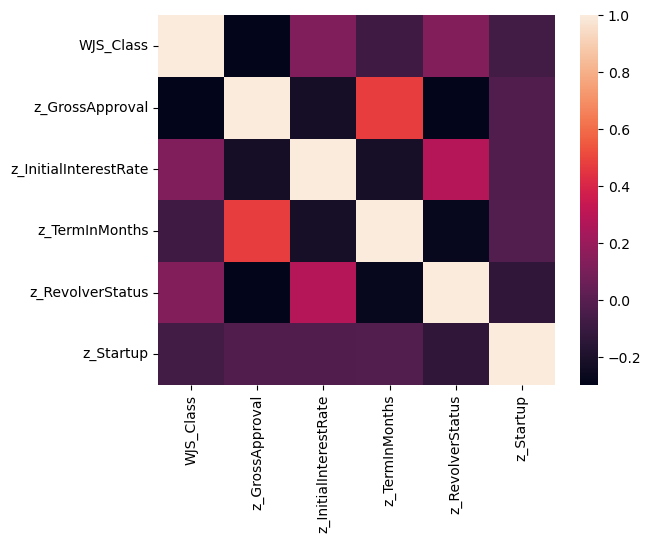

In [29]:
# Plotting the correlation heatmap for the selected transformed variables.

ax = sns.heatmap(df.corr(), annot = False)

In [31]:
# Replace null values with median and make values.

df["z_GrossApproval"] = df["z_GrossApproval"].fillna(df["z_GrossApproval"].median())



In [32]:
# Count the null values for each feature column

df.isnull().sum()

WJS_Class                0
z_GrossApproval          0
z_InitialInterestRate    0
z_TermInMonths           0
z_RevolverStatus         0
z_Startup                0
dtype: int64

In [33]:
# Import packages for classification models

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

In [34]:
# Establish X and y variables. Everyone does price predictions on housing or property data. 

X = df.drop(["WJS_Class"], axis=1)
y = df["WJS_Class"]


In [35]:
# Print y variable to check it. 

print(y)

0         1
1         0
2         0
3         1
4         1
         ..
168206    1
168207    0
168208    0
168209    0
168210    1
Name: WJS_Class, Length: 168211, dtype: int64


Splitting Dataset into Training and Test set
I played with the test_size at various levels, .30, .20, .50, .33 etc. 

.33 was the best balance. 

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=123)
print(X)


        z_GrossApproval  z_InitialInterestRate  z_TermInMonths  \
0             -0.253571              -0.555371       -1.046986   
1              0.505877              -0.061858        1.952245   
2              0.448093               0.184899       -0.325652   
3             -0.614584               1.171927       -1.198846   
4             -0.584867               2.405712       -0.325652   
...                 ...                    ...             ...   
168206        -0.580464               2.035576       -0.325652   
168207         3.435804               1.295306        2.104105   
168208         1.271928               1.788819        2.104105   
168209         3.586483               1.542063        1.192946   
168210         1.836561               1.912198        0.433647   

        z_RevolverStatus  z_Startup  
0              -0.595388  -0.449727  
1              -0.595388  -0.449727  
2              -0.595388  -0.449727  
3              -0.595388  -0.449727  
4               1

In [37]:
# Checking the shape of X_train and X_test.

X_train.shape, X_test.shape

((134568, 5), (33643, 5))

In [38]:
# Checking data types in X_train.

X_train.dtypes

z_GrossApproval          float64
z_InitialInterestRate    float64
z_TermInMonths           float64
z_RevolverStatus         float64
z_Startup                float64
dtype: object

# Random Forest Classifier Model with default parameters


In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# instantiate the classifier with n_estimators = 100

clf = RandomForestClassifier(n_estimators = 200, max_depth = None, min_samples_split = 3, max_features = "auto", random_state=0)



# fit the model to the training set

clf.fit(X_train, y_train)


# Predict on the test set results

y_pred = clf.predict(X_test)



# Check accuracy score 

print('Model accuracy score  : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score  : 0.7187


In [41]:
# View the feature scores.

feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores



z_GrossApproval          0.649232
z_InitialInterestRate    0.214470
z_TermInMonths           0.111314
z_RevolverStatus         0.013297
z_Startup                0.011687
dtype: float64

z_GrossApproval is the most important feature in this model, followed by Initial Interest Rate and Term in Months. Binary features like z_Revolver Status and z_Startup played less of a role. But removing them from the models for this project lowered each models' accuracy. So, we are keeping them in.

For a fun fact: when the WJS_class feature had jobs supported <= 5 or not (>= 5), the model accuracy was 0.6462. We got an accuracy boost by adjusting WJS_class to <= 10 or >= 10 jobs supported as a binary variable. 

When Jobs Supported is <=5 or not ( > 5), model accuracy score is 0.6462. 

# Decision Tree Classifier

In [43]:
# Import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

In [44]:
# Instantiate the DecisionTreeClassifier model with criterion gini index

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)


# Fit the model

clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [45]:
# Get the model accuracy score

from sklearn.metrics import accuracy_score
y_pred_gini = clf_gini.predict(X_test)

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.7273


In [46]:
# Compare train set and test set accuaracy

y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [47]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.7282


In [48]:
# Check for overfititng and underfitting

# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.7282
Test set score: 0.7273


Since the training set score and test set score are close, overfitting is not occurring.

[Text(0.5, 0.875, 'X[0] <= -0.364\ngini = 0.412\nsamples = 134568\nvalue = [39119, 95449]'),
 Text(0.25, 0.625, 'X[0] <= -0.534\ngini = 0.257\nsamples = 69100\nvalue = [10440, 58660]'),
 Text(0.125, 0.375, 'X[4] <= 0.887\ngini = 0.19\nsamples = 40358\nvalue = [4279, 36079]'),
 Text(0.0625, 0.125, 'gini = 0.166\nsamples = 35258\nvalue = [3216, 32042]'),
 Text(0.1875, 0.125, 'gini = 0.33\nsamples = 5100\nvalue = [1063, 4037]'),
 Text(0.375, 0.375, 'X[0] <= -0.421\ngini = 0.337\nsamples = 28742\nvalue = [6161, 22581]'),
 Text(0.3125, 0.125, 'gini = 0.317\nsamples = 22354\nvalue = [4421, 17933]'),
 Text(0.4375, 0.125, 'gini = 0.396\nsamples = 6388\nvalue = [1740, 4648]'),
 Text(0.75, 0.625, 'X[0] <= 1.001\ngini = 0.492\nsamples = 65468\nvalue = [28679, 36789]'),
 Text(0.625, 0.375, 'X[2] <= -0.054\ngini = 0.478\nsamples = 50374\nvalue = [19859, 30515]'),
 Text(0.5625, 0.125, 'gini = 0.496\nsamples = 32966\nvalue = [15026, 17940]'),
 Text(0.6875, 0.125, 'gini = 0.401\nsamples = 17408\nvalue

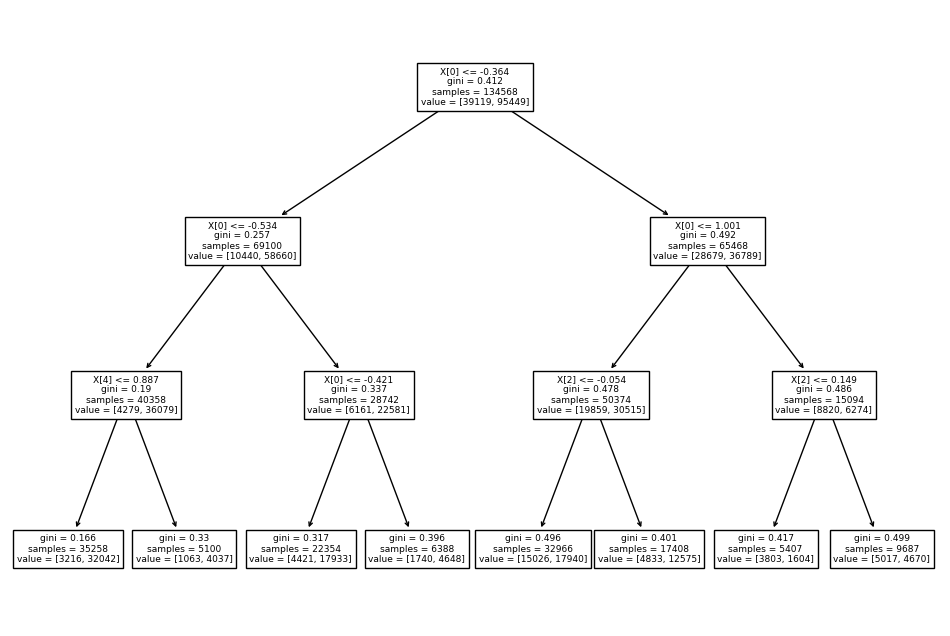

In [50]:
# Visualize the decision tree

plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train)) 

 

# XGBoost 

In [51]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score

model = XGBClassifier(random_state=123)
model.fit(X_train, y_train)
y_train_hat = model.predict(X_train)
y_test_hat = model.predict(X_test)

print(model)
print('Train performance')
print('-------------------------------------------------------')
print(classification_report(y_train, y_train_hat))

print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, y_test_hat))

print('Roc_auc score')
print('-------------------------------------------------------')
print(roc_auc_score(y_test, y_test_hat))
print('')

print('Confusion matrix')
print('-------------------------------------------------------')
print(confusion_matrix(y_test, y_test_hat))


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=123, ...)
Train performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.66      0.35      0.46     39119
           1       0.78      0.93      0.85     95449

    accurac

75% accuracy looks promising compared to the other models so far!

# Extra Trees aka Extremely Randomized Trees

In [52]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import roc_auc_score

model = ExtraTreesClassifier(random_state=123)
model.fit(X_train, y_train)
y_train_hat = model.predict(X_train)
y_test_hat = model.predict(X_test)

print(model)
print('Train performance')
print('-------------------------------------------------------')
print(classification_report(y_train, y_train_hat))

print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, y_test_hat))

print('Roc_auc score')
print('-------------------------------------------------------')
print(roc_auc_score(y_test, y_test_hat))
print('')

print('Confusion matrix')
print('-------------------------------------------------------')
print(confusion_matrix(y_test, y_test_hat))

ExtraTreesClassifier(random_state=123)
Train performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.80      0.84     39119
           1       0.92      0.95      0.94     95449

    accuracy                           0.91    134568
   macro avg       0.90      0.88      0.89    134568
weighted avg       0.91      0.91      0.91    134568

Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.49      0.41      0.45      9667
           1       0.78      0.83      0.80     23976

    accuracy                           0.71     33643
   macro avg       0.64      0.62      0.63     33643
weighted avg       0.70      0.71      0.70     33643

Roc_auc score
-------------------------------------------------------
0.6199564728861133

Confusion matrix
-----------------------------------------------------

71% accuracy is a bit lower than expected. Let's try some other models. 

# KNN Classification



In [54]:
def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("TRAINIG RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

    print("TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

In [55]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=2)
knn_clf.fit(X_train, y_train)
evaluate(knn_clf, X_train, X_test, y_train, y_test)

C:\Users\rakim\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\rakim\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[34744  4375]
 [27602 67847]]
ACCURACY SCORE:
0.7624
CLASSIFICATION REPORT:
                      0             1  accuracy      macro avg   weighted avg
precision      0.557277      0.939423  0.762373       0.748350       0.828333
recall         0.888162      0.710819  0.762373       0.799491       0.762373
f1-score       0.684847      0.809287  0.762373       0.747067       0.773112
support    39119.000000  95449.000000  0.762373  134568.000000  134568.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[ 6106  3561]
 [ 9414 14562]]
ACCURACY SCORE:
0.6143
CLASSIFICATION REPORT:
                     0             1  accuracy     macro avg  weighted avg
precision     0.393428      0.803509  0.614333      0.598469      0.685676
recall        0.631633      0.607357  0.614333      0.619495      0.614333
f1-score      0.484853      0.691798  0.614333      0.588326      0.632334
support    9667.000000  23976.000000  0.614333  33643.000000  33643.000000


Untuned test accuracy was 61.43%. Time to modify the K value to see if we can't improve the results.  

In [56]:
# Choose a K value

In [58]:
import warnings
warnings.filterwarnings("ignore")
scores = []

for n in range(2, 100):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    scores.append(score)

Text(0.5, 0, 'K nearest neighbors')

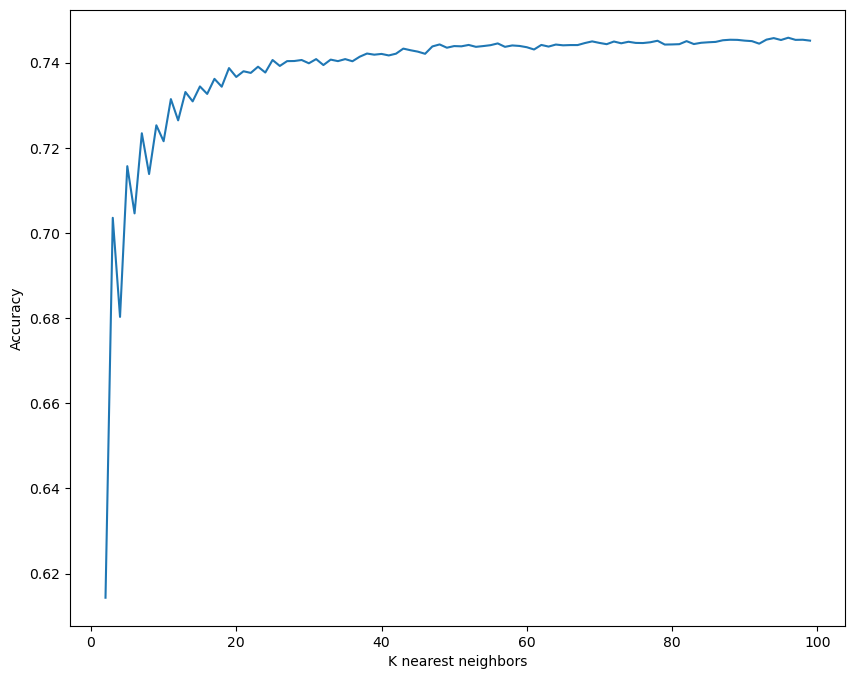

In [59]:
plt.figure(figsize=(10, 8))
plt.plot(range(2, 100), scores)
plt.ylabel("Accuracy")
plt.xlabel("K nearest neighbors")

In [61]:
# Retrain the model with the best K value (up to you to decide what you want) and re-do the classification report and the confusion matrix.

In [62]:
knn_clf = KNeighborsClassifier(n_neighbors=100)
knn_clf.fit(X_train, y_train)

evaluate(knn_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[13232 25887]
 [ 8072 87377]]
ACCURACY SCORE:
0.7476
CLASSIFICATION REPORT:
                      0             1  accuracy      macro avg   weighted avg
precision      0.621104      0.771445  0.747644       0.696275       0.727741
recall         0.338250      0.915431  0.747644       0.626841       0.747644
f1-score       0.437979      0.837293  0.747644       0.637636       0.721212
support    39119.000000  95449.000000  0.747644  134568.000000  134568.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[ 3138  6529]
 [ 2041 21935]]
ACCURACY SCORE:
0.7453
CLASSIFICATION REPORT:
                     0             1  accuracy     macro avg  weighted avg
precision     0.605908      0.770623  0.745266      0.688266      0.723294
recall        0.324609      0.914873  0.745266      0.619741      0.745266
f1-score      0.422740      0.836575  0.745266      0.629658      0.717664
support    9667.000000  23976.000000  0.745266  33643.000000  33643.000000


74.53 test accuracy is much better but slightly lower than the untuned XGBoost. 

# Deep Learning Classification Model 

In [63]:
# Import packages for deep learning classification algorithm. 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import keras
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


In [64]:
# Feature Scaling because we don't want one independent variable dominating the other and it makes computations easy.

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [65]:
# Sequential model to initialise our ann and dense module to build the layers

from keras.models import Sequential
from keras.layers import Dense

In [68]:
classifier = Sequential()
# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 5))

# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN | means applying SGD on the whole ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100,verbose = 0)

score, acc = classifier.evaluate(X_train, y_train,
                            batch_size=10)
print('Train score:', score)
print('Train accuracy:', acc)
# Part 3 - Making predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

print('*'*20)
score, acc = classifier.evaluate(X_test, y_test,
                            batch_size=10)
print('Test score:', score)
print('Test accuracy:', acc)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)


13457/13457 [==============================] - 8s 554us/step - loss: 0.5174 - accuracy: 0.7450
Train score: 0.5174179077148438
Train accuracy: 0.7450136542320251
1052/1052 [==============================] - 1s 472us/step
********************
3365/3365 [==============================] - 2s 552us/step - loss: 0.5135 - accuracy: 0.7455
Test score: 0.5135384798049927
Test accuracy: 0.7454745173454285


In [ ]:
Test accuracy is 74.54%. 

Evaluation Metrics

Text(0.5, 20.049999999999997, 'Predicted label')

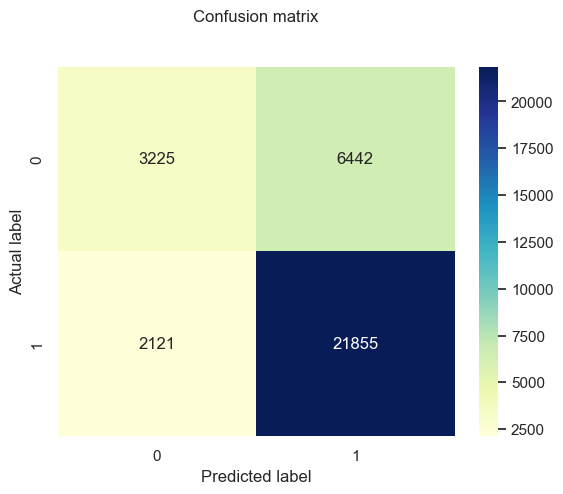

In [70]:
import seaborn as sns
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [71]:
# Get the classification report 

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.60      0.33      0.43      9667
           1       0.77      0.91      0.84     23976

    accuracy                           0.75     33643
   macro avg       0.69      0.62      0.63     33643
weighted avg       0.72      0.75      0.72     33643



1052/1052 [==============================] - 0s 454us/step


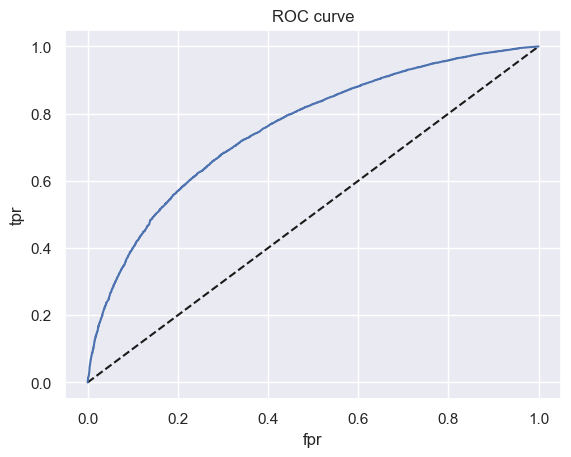

In [72]:
# Plot ROC curve 

from sklearn.metrics import roc_curve
y_pred_proba = classifier.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [73]:
# Area under ROC curve

from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.7555137526927294

# Voting Classifier



In [75]:
# Import packages to test models 

from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

In [76]:
clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = GaussianNB()


In [77]:
eclf = VotingClassifier(
    estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)],
    voting='hard')

In [78]:
for clf, label in zip([clf1, clf2, clf3, eclf], ['Logistic Regression', 'Random Forest', 'naive Bayes', 'Ensemble']):
    scores = cross_val_score(clf, X, y, scoring='accuracy', cv=5)
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))
    

Accuracy: 0.73 (+/- 0.00) [Logistic Regression]
Accuracy: 0.70 (+/- 0.01) [Random Forest]
Accuracy: 0.72 (+/- 0.01) [naive Bayes]
Accuracy: 0.73 (+/- 0.00) [Ensemble]


In [ ]:
Accuracy for Logistic Regression, Random Forest, Naive Bayes and Ensemble voting classifier 
are in the low 70s below XGBoost. 

# AdaBoost

In [80]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier

In [81]:
>>> clf = AdaBoostClassifier(n_estimators=1000)
>>> scores = cross_val_score(clf, X, y, cv=5)
>>> scores.mean()

0.7429656530779123

# Gradient Boosting Classifier

In [82]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
   max_depth=1, random_state=0).fit(X_train, y_train)
clf.score(X_test, y_test)


0.7467229438516184

# Gaussian Naive Bayes

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"
       % (X_test.shape[0], (y_test != y_pred).sum()))


1 - 23714/84106 

Accuracy is 71.80

# Histogram-Based Gradient Boosting

In [86]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.datasets import make_hastie_10_2
clf = HistGradientBoostingClassifier(max_iter=100).fit(X_train, y_train)
clf.score(X_test, y_test)


0.7469978360640145

Accuracy is 74.69%.

# Linear Discriminant Analysis


In [87]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
clf1 = QuadraticDiscriminantAnalysis()
clf1.fit(X_train, y_train)
clf1.score(X_test, y_test)


0.7311844577081302

Accuracy is 73.11%.

# Bagging classifier


In [89]:
# Import Packages

from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

In [90]:
# initialize the base classifier
base_cls = DecisionTreeClassifier()
 
# no. of base classifier
num_trees = 200

kfold = model_selection.KFold(n_splits = 6,
                       random_state = None)
# bagging classifier
model = BaggingClassifier(base_estimator = base_cls,
                          n_estimators = num_trees,
                          random_state = 123)
 
results = model_selection.cross_val_score(model, X, y, cv = kfold)
print("accuracy :")
print(results.mean())

accuracy :
0.6992050194595958


Accuracy is 69.92 with 6 splits.

XGBoost has 75% accuracy and Artificial Neural Network has 75% accuracy. But XGBoost runs substantially faster than ANN. 
Therefore, we are choosing XGBoost as our base model of choice. 

In addition, standardizing the data by converting to z-scores decreased the accuracy slightly in most of the models and had no
notable performance (runtime) improvements. 

# Model chosen: XGBoost Model 

In [92]:
# Import packages 

import xgboost as xgb

xgb_cl = xgb.XGBClassifier()

print(type(xgb_cl))

<class 'xgboost.sklearn.XGBClassifier'>


In [93]:
from sklearn.metrics import accuracy_score

# Init classifier
xgb_cl = xgb.XGBClassifier()

# Fit
xgb_cl.fit(X_train, y_train)

# Predict
preds = xgb_cl.predict(X_test)

# Score
accuracy_score(y_test, preds)

0.745190592823342

Baseline accuracy is 74.519%. 

In [94]:
# Let's tune the XGBoost Model

In [95]:
from sklearn.metrics import accuracy_score

# Init classifier
xgb_cl = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

# Fit
xgb_cl.fit(X_train, y_train)

# Predict
preds = xgb_cl.predict(X_test)

# Score
accuracy_score(y_test, preds)

0.745190592823342

For reference, the parameters altered include (with descriptions): 

Learning_rate: between 0.01 to 0.2

gamma, reg_alpha,, reg_lambda: specifies the three types of regularization done by XGBoost - minimmum loss reduction to create a new split, L1 reg on leaf weights, L2 reg leaf weights respectively.
Gamma: 0 - 0.5, depends on the data
reg_alpha and reg_lambda: 0 - 1, depends on the data

max_depth = how deep the tree's decision nodes go.
a positive number between 1 - 10 usually

subsample: fraction of the training set that is used to train each tree. Can lead to underfitting if too low and overfitting if too high. 
a number betweeen 0.5 to 0.9






In [96]:
# Grid SearchCV that accepts possible values for desired hyperparameters and fits separate models on the given 
# data for each combination of hyperparameters.

param_grid = {
    "max_depth": [3, 4, 5, 7],
    "learning_rate": [0.1, 0.01, 0.05],
    "gamma": [0, 0.25, 1],
    "reg_lambda": [0, 1, 10],
    "scale_pos_weight": [1, 3, 5],
    "subsample": [0.8],
    "colsample_bytree": [0.5],
}

In [97]:
from sklearn.model_selection import GridSearchCV

# Init classifier
xgb_cl = xgb.XGBClassifier(objective="binary:logistic")

# Init Grid Search
grid_cv = GridSearchCV(xgb_cl, param_grid, n_jobs=-1, cv=3, scoring="roc_auc")

# Fit
_ = grid_cv.fit(X_train, y_train)

In [98]:
grid_cv.best_score_

0.7579411036221447

In [99]:
grid_cv.best_params_



{'colsample_bytree': 0.5,
 'gamma': 1,
 'learning_rate': 0.1,
 'max_depth': 7,
 'reg_lambda': 10,
 'scale_pos_weight': 1,
 'subsample': 0.8}

In [100]:
# Insert the new fixed values to the grid

param_grid["scale_pos_weight"] = [3]
param_grid["subsample"] = [0.8]
param_grid["colsample_bytree"] = [0.5]

# Give new value ranges to other params

param_grid["gamma"] = [3, 5, 7]
param_grid["max_depth"] = [9, 15, 20]
param_grid["reg_lambda"] = [10, 30, 50]
param_grid["learning_rate"] = [0.3, 0.5, 0.7, 1]

In [101]:
grid_cv_2 = GridSearchCV(xgb_cl, param_grid, 
                         cv=3, scoring="roc_auc", n_jobs=-1)

_ = grid_cv_2.fit(X_train, y_train)

grid_cv_2.best_score_

0.7582244547050191

In [102]:
# Final Classifier

final_cl = xgb.XGBClassifier(
    **grid_cv.best_params_,
    objective="binary:logistic",
)

In [103]:
from sklearn.metrics import roc_auc_score

_ = final_cl.fit(X_train, y_train)

preds = final_cl.predict(X_test)

Model chosen: XGBoost Model (tuned)

Classification models may yield better predictive accuracy than regressions for this type of dataset.  Tree-based models and deep learning techniques tend to produce better results. This is probably due to how these types of models mimic how humans think. 

Supervised learning models are a potentially viable approach to classify the number of jobs supported. 
For this model, that means: 

1 = less than or equal 10 jobs supported 
0 = greater than 10 jobs supported 

The jobs supported feature was winsorized down to a max of 20. 

These steps increased accuracy of all models from about 50% to a max of 75% (tuned). The XGBoost yielded the highest accuracy figure (75.79%) and performed computations at the fastest speeds. Other models evaluated performed on bar with XGBoost, but all took longer to run. With additional feature engineering, this model may perform in the 90% range for accuracy with relatively high speeds. This is critical in a production like environment.  

The best parameters for this model are: 

colsample_bytree: 0.5
gamma: 1,
learning_rate: 0.1
max_depth: 7
reg_lambda: 10
scale_pos_weight: 1
subsample: 0.8

The original datasource is a file from the internet. Connecting to the data source is a simple matter since the data source is online in CSV and JSON file formats. The key would be to incorporate this model in Streamlit or another web app for use online. This model will enable users, like those at SBA, to predict how many jobs would be supported by inputs of Gross Approval, Initial Interest Rate, Term In Months, Revolver Status, and Startup features. This will help solve a perennial problem in federal government: managing the cost of programs and getting the most value of each program. Examining the gross approval, initial interest rate, term in months, revolver status, and startup feature will point agency officials into the right direction when determining viability of approving or denying 7(a) loans for applicants.

For instance, loans that may support only 0 or 1 jobs may not be as viable to move forward as an application for 500. 

Future projects can oerform additional feature engineering to increase model accuracy. Adding data from prior years may improve model accuracy. The next step afterwards would be to deploy the model online. 
